**Name :** Akawat Moradsatian

**ID :** 6609681231

**Section 870001**

# **CS245 Data Analysis**

## Problem : ต้องการทราบสาเหตุส่วนมากที่เกิดอุบัติเหตุบนท้องถนนในประเทศไทย

## Import library

In [2]:
#import library

#!pip install dataprep
#!pip install pyshp
import pandas as pd
import numpy as np
#from dataprep.datasets import load_dataset
#from dataprep.eda import plot
import matplotlib.pyplot as plt
import seaborn as sns
#import shapefile as shp

## **Data Acquisition**
### - Dataset : **Thailand Fatal Road Accident [2011-2022]** in Kaggle.com
### Kaggle link : https://www.kaggle.com/datasets/thaweewatboy/thailand-fatal-road-accident

### - ข้อมูลที่พิจารณา (ตัวแปรของข้อมูล)
* age
* gender
* nationality
* accident_cause
* vehicle type
* province
* latitude & longtitude

### 1. นำเข้าข้อมูลจาก google drive
* เนื่องด้วยเราจะวิเคราะห์ข้อมูลจาก dataset ภายนอก จึงต้องมีการนำเข้าชุดข้อมูลเพื่อนำมาวิเคราะห์

1.1 เชือมต่อกับ Google Drive

In [ ]:
# #Connect to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.2 นำเข้าข้อมูล csv จาก google drive

In [4]:
#import csv from google drive
# roadaccident_df = pd.read_csv('/content/drive/MyDrive/CS240 245/thailand road accidents/thailand_fatal_raod_accident_2011_2022.csv',low_memory=False)
# use roadaccident_df as a pandas dataset (low_memory=False for the large and many type in 1 column dataset)

roadaccident_df = pd.read_csv('thailand_fatal_raod_accident_2011_2022.csv',low_memory=False)

### 2. แสดงชุดข้อมูลที่นำเข้ามาจากไฟล์ csv
* เราจะดูว่าชุดข้อมูลที่นำเข้าถูกต้องหรือไม่

In [5]:
#Show all data in dataset
roadaccident_df

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_th,district_th,sub_district_th,province_en,district_en,sub_district_en,latitude,longitude
0,2011-01-01 00:25:00,2011-01-01,21.0,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,unidentified,เพชรบูรณ์,บึงสามพัน,บึงสามพัน,Phetchabun,Bueng Sam Phan,Bueng Sam Phan,15.794114,101.006878
1,2011-01-01 06:35:00,2011-01-01,23.0,Male,Thai,V299,Motorcycle rider [any] injured in unspecified ...,moterbike,สุราษฎร์ธานี,พนม,พังกาญจน์,Surat Thani,Phanom,Phangkan,8.916207,98.890434
2,2011-01-01 19:00:00,2011-01-01,26.0,Male,Thai,V234,Motorcycle rider injured in collision with car...,moterbike,ระยอง,บ้านฉาง,บ้านฉาง,Rayong,Ban Chang,Ban Chang,12.734329,101.065845
3,2011-01-01 02:00:00,2011-01-01,16.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,พิษณุโลก,บางระกำ,ปลักแรด,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
4,2011-01-01 02:00:00,2011-01-01,12.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,พิษณุโลก,บางระกำ,ปลักแรด,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240919,NaN,2022-01-03,30.0,Male,Unknown,Unknown,Unknown,unidentified,นครราชสีมา,ไม่ระบุ,ไม่ระบุ,Nakhon Ratchasima,Unknown,Unknown,15.057413,102.347003
240920,NaN,2022-01-03,74.0,Female,Unknown,Unknown,Unknown,tricycle,อุดรธานี,ไม่ระบุ,ไม่ระบุ,Udon Thani,Unknown,Unknown,17.682571,103.193136
240921,NaN,2022-01-02,43.0,Female,Unknown,Unknown,Unknown,moterbike,จันทบุรี,ไม่ระบุ,ไม่ระบุ,Chanthaburi,Unknown,Unknown,12.505357,102.155707
240922,NaN,2022-01-01,NaN,Male,Unknown,Unknown,Unknown,unidentified,เพชรบูรณ์,ไม่ระบุ,ไม่ระบุ,Phetchabun,Unknown,Unknown,15.610476,101.061989


### 3. แสดงลักษณะของชุดข้อมูล


In [ ]:
#show dataset dimension
roadaccident_df.shape
# syntax : (row,column)

(240924, 16)

จะเห็นได้ว่าชุดข้อมูลนี้มี **240924 แถว** และ **16 คอลัมน์**

### 4. ข้อมูลคอลัมน์ (ฟีเจอร์) ของชุดข้อมูลนี้
* list feature ว่าแต่ละคอลัมน์ข้อมูลมีลักษณะเป็นอย่างไร

* ข้อมูลในแต่ละแถวคือผู้ประสบอุบัติเหตุรายบุคคล
* ข้อมูลเกือบทุกแถวเป็นข้อมูลเชิงคุณภาพ ยกเว้น age

| Variable | Description |
| --- | :- |
| accident_date | date and time of the accident |
| official_death_date | death date of person in accident |
| age | ages of person in accident |
| gender | gender of person in accident  |
| nationality | nationality of person in accident  |
|accident_cause_code	| accident cause code (Format : Axxx) ; x is number 0 - 9 and A is main cause of accidents|
|accident_cause	| cause of the accident |
|vehicle_type	| type of vechicle that in accident |
|province_th	| province that accident is in (Thai Name)  |
|district_th	| district that accident is in (Thai Name)  |
|sub_district_th	| subdistrict that accident is in (Thai Name)  |
|province_en	| province that accident is in (English Name)  |
|district_en	| district that accident is in (English Name)  |
|sub_district_en | subdistrict that accident is in (English Name)  |
|latitude	| latitude position of the encoutered accident  |
|longitude | longtitude position of the encoutered accident |





### 5. ข้อมูลอ้างอิง accident_cause_code
* สำหรับอ้างอิงโค้ดอุบัติเหตุเท่านั้น

In [ ]:
# drop_duplicate : drop only on accident_cause_code to find unique code
# loc : show only on column "accident_cause_code" and "accident_cause"
# sort_value : sort value by accident_cause_code ascending type
acc_df = roadaccident_df.drop_duplicates(subset=['accident_cause_code']).loc[:, ["accident_cause_code","accident_cause"]].sort_values(by="accident_cause_code")
acc_df

,accident_cause_code,accident_cause
454,Unknown,Unknown
86059,V010,Pedestrian injured in collision with pedal cyc...
42550,V011,Pedestrian injured in collision with pedal cyc...
45088,V019,Pedestrian injured in collision with pedal cyc...
6030,V020,Pedestrian injured in collision with two-or th...
...,...,...
127688,Y299,"Contact with blunt object, undetermined intent..."
156929,Y329,"Crashing of motor vehicle, undetermined intent..."
175158,Y348,"Unspecified event, undetermined intent at othe..."
127316,Y349,"Unspecified event, undetermined intent at unsp..."


## **Data Preparation**

### 1. Drop ข้อมูลที่ไม่จำเป็นในการวิเคราะห์ข้อมูล

* ข้อมูลที่ไม่จำเป็นในชุดข้อมูลนี้ คือ
    * **province_th** : ชื่อจังหวัดในภาษาไทย สามารถอ้างอิงจากคอลัมน์ภาษาอังกฤษ (province_en) ได้
    * **district_th** : ชื่ออำเภอในภาษาไทย สามารถอ้างอิงจากคอลัมน์ภาษาอังกฤษ (district_en) ได้
    * **sub_district_th** : ชื่อตำบลในภาษาไทย สามารถอ้างอิงจากคอลัมน์ภาษาอังกฤษ (sub_district_en) ได้


* Drop คอลัมน์ที่ได้กล่าวไปด้านบน

In [ ]:
#drop unnessary features
roadacci_preclean_df = roadaccident_df.drop([ 'province_th','district_th','sub_district_th'], axis=1)
roadacci_preclean_df

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_en,district_en,sub_district_en,latitude,longitude
0,2011-01-01 00:25:00,2011-01-01,21.0,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,unidentified,Phetchabun,Bueng Sam Phan,Bueng Sam Phan,15.794114,101.006878
1,2011-01-01 06:35:00,2011-01-01,23.0,Male,Thai,V299,Motorcycle rider [any] injured in unspecified ...,moterbike,Surat Thani,Phanom,Phangkan,8.916207,98.890434
2,2011-01-01 19:00:00,2011-01-01,26.0,Male,Thai,V234,Motorcycle rider injured in collision with car...,moterbike,Rayong,Ban Chang,Ban Chang,12.734329,101.065845
3,2011-01-01 02:00:00,2011-01-01,16.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
4,2011-01-01 02:00:00,2011-01-01,12.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240919,NaN,2022-01-03,30.0,Male,Unknown,Unknown,Unknown,unidentified,Nakhon Ratchasima,Unknown,Unknown,15.057413,102.347003
240920,NaN,2022-01-03,74.0,Female,Unknown,Unknown,Unknown,tricycle,Udon Thani,Unknown,Unknown,17.682571,103.193136
240921,NaN,2022-01-02,43.0,Female,Unknown,Unknown,Unknown,moterbike,Chanthaburi,Unknown,Unknown,12.505357,102.155707
240922,NaN,2022-01-01,NaN,Male,Unknown,Unknown,Unknown,unidentified,Phetchabun,Unknown,Unknown,15.610476,101.061989


จะเห็นได้ว่า คอลัมน์ของข้อมูลที่กล่าวไปได้ถูกลบเรียบร้อยแล้ว

### 2. เช็คและจัดการข้อมูลที่ไม่สอดคล้องกัน
* บางข้อมูลอาจมีข้อมูลที่ไม่สอดคล้องกัน จึงต้องเช็คว่ามีหรือไม่

2.1 หาค่าคอลัมน์ทุกคอลัมน์ที่ต่างกันในชุดข้อมูล

In [ ]:
#find unique value in each features
for n in roadacci_preclean_df.select_dtypes(include="object").columns:
  print(n)
  print(roadacci_preclean_df[n].unique())
  print("\n")

accident_date
['2011-01-01 00:25:00' '2011-01-01 06:35:00' '2011-01-01 19:00:00' ...
 '2021-08-20 13:52:00' '2021-05-01 01:40:00' '2021-01-16 19:30:00']


official_death_date
['2011-01-01' '2011-01-02' '2011-01-03' ... '2022-10-16' '2022-10-18'
 '2022-10-06']


gender
['Male' 'Female' 'Unknown']


nationality
['Thai' 'Unknown' 'German' 'Macedonian' 'Bosnian Herzegovinian'
 'Danish Dane' 'British Briton' 'Dutch Dutchman' 'Yemeni' 'Japanese'
 'French' 'Burmese' 'Norwegian' 'Australian' 'American' 'Swazi' 'Malian'
 'Italian' 'Cambodian' 'Belgian' 'Chinese' 'Swedish Swede' 'Icelander'
 'Malaysian' 'Austrian' 'Israeli' 'Romanian' 'Lao Laotian' 'Vietnamese'
 'Beninese' 'Iranian' 'Malawian' 'Bahraini' 'Ukrainian' 'Colombian'
 'Bahamian' 'Afghan' 'Burundian' 'Ecuadorian' 'Bruneian' 'Lithuanian'
 'Comoran' 'Belarusian' 'Russian' 'Polish Pole' 'Cuban']


accident_cause_code
['V892' 'V299' 'V234' 'V429' 'V249' 'V284' 'V479' 'V244' 'V499' 'V899'
 'V239' 'V229' 'V021' 'V289' 'V235' 'V274' 'V385' 'V

&emsp;จากข้อมูลด้านบนจะเห็นได้ว่า **ชุดข้อมูลนี้ไม่มีข้อมูลที่ผิดปกติ**

### 3. เช็คและจัดการข้อมูลที่ซ้ำกัน
* เนื่องด้วยเป็นข้อมูลที่ยังไม่ได้ cleaned จึงต้องเช็คว่ามีข้อมูลซ้ำหรือไม่

3.1 เช็คข้อมูลว่ามีซ้ำกันหรือไม่

In [ ]:
#check all rows duplicate
roadacci_preclean_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
240919,False
240920,False
240921,False
240922,False


In [ ]:
#sum all duplicate
roadacci_preclean_df.duplicated().sum()

2478

&emsp;คุณจะเห็นได้ว่า ชุดข้อมูลนี้มี**แถวที่ซ้ำกันถึง 2478 ตัว**

3.2 แสดงผลแถวของชุดข้อมูลที่ซ้ำกัน

In [ ]:
#show all duplicate rows
roadacci_preclean_df[roadacci_preclean_df.duplicated()]

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_en,district_en,sub_district_en,latitude,longitude
212,2011-04-07 19:20:00,2011-04-07,16.0,Male,Thai,V239,Motorcycle rider injured in collision with car...,moterbike,Si Sa Ket,Uthumphon Phisai,Khok Chan,14.977377,104.093365
456,2011-10-15 17:00:00,2011-10-15,17.0,Male,Thai,V091,Pedestrian injured in unspecified nontraffic a...,pedestrian,Ubon Ratchathani,King Amphoe Natal,Phalan,15.908797,105.277375
1012,2011-10-27 16:35:00,2011-10-27,15.0,Female,Thai,V299,Motorcycle rider [any] injured in unspecified ...,moterbike,Ubon Ratchathani,Buntharik,Bua Ngam,14.761233,105.400956
1244,2011-09-25 11:30:00,2011-09-25,16.0,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,unidentified,Si Sa Ket,Phu Sing,Huay Tik Chu,14.552170,104.142234
1374,2011-11-20 19:10:00,2011-11-20,15.0,Male,Thai,V299,Motorcycle rider [any] injured in unspecified ...,moterbike,Nong Bua Lam Phu,Na Wang,Thep Khiri,17.321817,102.116160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239930,NaN,2022-09-06,18.0,Female,Thai,Unknown,Unknown,moterbike,Krabi,Khao Phanom,Phrutiao,8.269929,99.125926
240309,NaN,2022-11-14,NaN,Female,Unknown,Unknown,Unknown,moterbike,Mae Hong Son,Unknown,Unknown,19.358955,98.439009
240331,NaN,2022-11-05,21.0,Male,Unknown,Unknown,Unknown,unidentified,Chiang Rai,Unknown,Unknown,19.667654,100.262231
240370,NaN,2022-10-20,32.0,Male,Unknown,Unknown,Unknown,unidentified,Loei,Unknown,Unknown,17.453121,101.730317


&emsp;ที่คุณเห็นเป็นแถวจำนวน 2478 แถวที่ซ้ำกัน ซึ่งจะทำการตัดทิ้งข้อมูลเหล่านี้

3.3 Drop แถวที่ซ้ำกัน

In [ ]:
#drop duplicate and show already drop duplicate dataset
roadacci_dropdup = roadacci_preclean_df.drop_duplicates()
roadacci_dropdup

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_en,district_en,sub_district_en,latitude,longitude
0,2011-01-01 00:25:00,2011-01-01,21.0,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,unidentified,Phetchabun,Bueng Sam Phan,Bueng Sam Phan,15.794114,101.006878
1,2011-01-01 06:35:00,2011-01-01,23.0,Male,Thai,V299,Motorcycle rider [any] injured in unspecified ...,moterbike,Surat Thani,Phanom,Phangkan,8.916207,98.890434
2,2011-01-01 19:00:00,2011-01-01,26.0,Male,Thai,V234,Motorcycle rider injured in collision with car...,moterbike,Rayong,Ban Chang,Ban Chang,12.734329,101.065845
3,2011-01-01 02:00:00,2011-01-01,16.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
4,2011-01-01 02:00:00,2011-01-01,12.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240919,NaN,2022-01-03,30.0,Male,Unknown,Unknown,Unknown,unidentified,Nakhon Ratchasima,Unknown,Unknown,15.057413,102.347003
240920,NaN,2022-01-03,74.0,Female,Unknown,Unknown,Unknown,tricycle,Udon Thani,Unknown,Unknown,17.682571,103.193136
240921,NaN,2022-01-02,43.0,Female,Unknown,Unknown,Unknown,moterbike,Chanthaburi,Unknown,Unknown,12.505357,102.155707
240922,NaN,2022-01-01,NaN,Male,Unknown,Unknown,Unknown,unidentified,Phetchabun,Unknown,Unknown,15.610476,101.061989


&emsp;นี่เป็นชุดข้อมูลที่ผ่านการลบแถวที่ซ้ำกันแล้ว คุณจะเห็นได้ว่าแถวที่ซ้ำไปได้ถูกลบแล้ว

&emsp;ตอนนี้คาดว่าจะมีแถวคงเหลือ คือ 240924 - 2478 = <b>238446 แถว</b>

3.4 เช็คว่าแถวที่ผ่านการ Drop แถวแล้วจะตรงกับที่คำนวณหรือไม่

In [ ]:
#show dimension of dataset
roadacci_dropdup.shape
# syntax : (row,column)

(238446, 13)

&emsp;คุณจะเห็นว่าแถวของชุดข้อมูลนี้**ลดลงเหลือ 238446 แถว** ซึ่งตรงกับที่คำนวณไว้ด้านบน

### 4. เช็คและจัดการข้อมูลสูญหาย (NA)
* เนื่องด้วยชุดข้อมูลที่ยังไม่ได้ cleaned มักจะมีข้อมูล NA จึงจะต้องกำจัดหรือแทนค่า เพื่อให้ค่าไม่มีช่องโหว่

4.1 เช็คทุกแถวและคอลัมน์ว่ามีจุดไหนที่ข้อมูลสูญหาย

In [ ]:
#check missing value
roadacci_dropdup.isnull()

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_en,district_en,sub_district_en,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240919,True,False,False,False,False,False,False,False,False,False,False,False,False
240920,True,False,False,False,False,False,False,False,False,False,False,False,False
240921,True,False,False,False,False,False,False,False,False,False,False,False,False
240922,True,False,True,False,False,False,False,False,False,False,False,False,False


&emsp;จากที่เช็คโดยดูจากชุดข้อมูล จะเห็นว่ามีข้อมูลใน accident_date สูญหาย

4.2 คำนวณหาว่าคอลัมน์แต่ละคอลัมน์มีข้อมูลสูญหายกี่ตัว

In [ ]:
#check every missing in each features
roadacci_dropdup.isnull().sum()

,0
accident_date,132022
official_death_date,0
age,27887
gender,0
nationality,0
accident_cause_code,0
accident_cause,0
vehicle_type,0
province_en,0
district_en,0


&emsp;ผลจากการคำนวณหาค่า จะเห็นได้ว่าคอลัมน์ <b>"accident_date"</b> และ <b>"age"</b> มีข้อมูลสูญหาย

4.3 จัดการกับข้อมูลสูญหาย

* คอลัมน์ <b>"accident_date"</b> จะทำการ Drop ทั้งแถว เนื่องด้วยความไม่ชัดเจนของเวลาที่เกิดอุบัติเหตุว่าเกิดจริงหรือไม่
* คอลัมน์ <b>"age"</b> จะทำการ Impute ค่า โดยใช้ค่าเฉลี่ยในการแทนที่ค่า

&emsp; 4.3.1 Drop ทั้งคอลัมน์ เมื่อ <b>"accident_date"</b> เป็นข้อมูลสูญหาย (พวก NA)

In [ ]:
#drop rows that accident_date is NA
roadacci_dropmissing_accidate = roadacci_dropdup.dropna(subset=['accident_date'])
roadacci_dropmissing_accidate

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_en,district_en,sub_district_en,latitude,longitude
0,2011-01-01 00:25:00,2011-01-01,21.0,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,unidentified,Phetchabun,Bueng Sam Phan,Bueng Sam Phan,15.794114,101.006878
1,2011-01-01 06:35:00,2011-01-01,23.0,Male,Thai,V299,Motorcycle rider [any] injured in unspecified ...,moterbike,Surat Thani,Phanom,Phangkan,8.916207,98.890434
2,2011-01-01 19:00:00,2011-01-01,26.0,Male,Thai,V234,Motorcycle rider injured in collision with car...,moterbike,Rayong,Ban Chang,Ban Chang,12.734329,101.065845
3,2011-01-01 02:00:00,2011-01-01,16.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
4,2011-01-01 02:00:00,2011-01-01,12.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218190,2021-01-03 17:00:00,2021-01-03,48.0,Unknown,Unknown,Unknown,Unknown,moterbike,Samut Prakarn,Bang Sao Thong,Bang Sao Thong,13.589909,100.780968
218191,2021-08-05 19:45:00,2021-08-05,NaN,Unknown,Unknown,Unknown,Unknown,moterbike,Samut Sakhon,Mueang,Bang Krachao,13.536127,100.211490
218192,2021-08-20 13:52:00,2021-08-20,46.0,Unknown,Unknown,Unknown,Unknown,moterbike,Rayong,Klaeng,Thang Kwian,12.782744,101.650726
218193,2021-05-01 01:40:00,2021-05-01,22.0,Unknown,Unknown,Unknown,Unknown,moterbike,Sa kaeo,Muang,Sa Kaeo,13.836766,102.050392


&emsp; 4.3.2 ทำการแทนที่ค่าในคอลัมณ์ "age" โดยคำนวณจากค่าเฉลี่ยของข้อมูลที่ไม่ขาดหาย

In [ ]:
#impute age data from others non-NA values
roadacci_fillmissing_age = roadacci_dropmissing_accidate.fillna(roadacci_dropmissing_accidate['age'].mean())
roadacci_fillmissing_age

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_en,district_en,sub_district_en,latitude,longitude
0,2011-01-01 00:25:00,2011-01-01,21.00000,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,unidentified,Phetchabun,Bueng Sam Phan,Bueng Sam Phan,15.794114,101.006878
1,2011-01-01 06:35:00,2011-01-01,23.00000,Male,Thai,V299,Motorcycle rider [any] injured in unspecified ...,moterbike,Surat Thani,Phanom,Phangkan,8.916207,98.890434
2,2011-01-01 19:00:00,2011-01-01,26.00000,Male,Thai,V234,Motorcycle rider injured in collision with car...,moterbike,Rayong,Ban Chang,Ban Chang,12.734329,101.065845
3,2011-01-01 02:00:00,2011-01-01,16.00000,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
4,2011-01-01 02:00:00,2011-01-01,12.00000,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218190,2021-01-03 17:00:00,2021-01-03,48.00000,Unknown,Unknown,Unknown,Unknown,moterbike,Samut Prakarn,Bang Sao Thong,Bang Sao Thong,13.589909,100.780968
218191,2021-08-05 19:45:00,2021-08-05,37.85377,Unknown,Unknown,Unknown,Unknown,moterbike,Samut Sakhon,Mueang,Bang Krachao,13.536127,100.211490
218192,2021-08-20 13:52:00,2021-08-20,46.00000,Unknown,Unknown,Unknown,Unknown,moterbike,Rayong,Klaeng,Thang Kwian,12.782744,101.650726
218193,2021-05-01 01:40:00,2021-05-01,22.00000,Unknown,Unknown,Unknown,Unknown,moterbike,Sa kaeo,Muang,Sa Kaeo,13.836766,102.050392


4.4 เช็คว่ายังคงมีข้อมูลสูญหายหรือไม่

In [ ]:
#check missing value
roadacci_fillmissing_age.isnull().sum()

,0
accident_date,0
official_death_date,0
age,0
gender,0
nationality,0
accident_cause_code,0
accident_cause,0
vehicle_type,0
province_en,0
district_en,0


&emsp;คุณจะเห็นว่าตอนนี้ในทุกคอลัมน์จะไม่มีข้อมูลสูญหาย

4.5 จัดการกับข้อมูลสูญหาย (2)
* เนื่องด้วยข้อมูลในส่วน accident_cause_code หรือ accident_cause บางค่ามีค่า unknown ซึ่งมีผลต่อการวิเคราะห์ข้อมูล จึงต้องทำการ Drop ค่าที่เป็น Unknown ออก

In [ ]:
#(Additional) drop accident that is unknown (making easier to filter accidents)
roadacci_dropunknown = roadacci_fillmissing_age[roadacci_fillmissing_age['accident_cause_code'] != 'Unknown']
roadacci_dropunknown

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_en,district_en,sub_district_en,latitude,longitude
0,2011-01-01 00:25:00,2011-01-01,21.0,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,unidentified,Phetchabun,Bueng Sam Phan,Bueng Sam Phan,15.794114,101.006878
1,2011-01-01 06:35:00,2011-01-01,23.0,Male,Thai,V299,Motorcycle rider [any] injured in unspecified ...,moterbike,Surat Thani,Phanom,Phangkan,8.916207,98.890434
2,2011-01-01 19:00:00,2011-01-01,26.0,Male,Thai,V234,Motorcycle rider injured in collision with car...,moterbike,Rayong,Ban Chang,Ban Chang,12.734329,101.065845
3,2011-01-01 02:00:00,2011-01-01,16.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
4,2011-01-01 02:00:00,2011-01-01,12.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213526,2021-11-29 18:00:00,2021-12-01,37.0,Male,Thai,Y349,"Unspecified event, undetermined intent at unsp...",moterbike,Bangkok,Lam Luk Ka,Lat Sawai,13.953694,100.665088
213527,2021-09-12 17:00:00,2021-12-11,52.0,Male,Thai,Y349,"Unspecified event, undetermined intent at unsp...",moterbike,Bangkok,Lam Luk Ka,Lam Sai,13.983395,100.856436
213528,2020-11-02 08:00:00,2021-02-25,40.0,Male,Thai,V289,Motorcycle rider injured in noncollision trans...,moterbike,Suphan Buri,Phanomthuan,Phangtru,14.128214,99.751629
213529,2020-09-05 18:50:00,2021-05-13,43.0,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,moterbike,Chumphon,Mueang,Pak Nam,10.419539,99.248110


จะเห็นจากชุดข้อมูลได้ว่า ค่า Unknown ได้หายไปแล้ว

### 5. จัดการกับ Outiners
* เนื่องจากมีข้อมูลเชิงปริมาณเพียงแค่ age จึงจะต้องจัดการกับ Outliners ด้วย

5.1 เช็คขนาดชุดข้อมูลก่อนจะ Drop outliners

In [ ]:
#check dimension of datasets
roadacci_dropunknown.shape
# syntax : (row,column)

(76746, 13)

&emsp; จะเห็นว่าก่อนจะ Drop **มี 76746 แถว**

5.2 หาค่า Q1 Q3 IQR Lower และ Higher Fence

In [ ]:
#find Q1 Q3 and IQR
Q1 = roadacci_dropunknown['age'].quantile(0.25)
Q3 = roadacci_dropunknown['age'].quantile(0.75)
IQR = Q3 - Q1
#find lower and higher fence
lowerfence = Q1 - 1.5 * IQR
upperfence = Q3 + 1.5 * IQR
#print calculated value
print("ค่า Quatile 1 คือ ",Q1)
print("ค่า Quatile 3 คือ ",Q3)
print("ค่า Inter-Quatile Range คือ",IQR)
print("ค่า Lower Fence : ",lowerfence)
print("ค่า Higher Fence : ",upperfence)


ค่า Quatile 1 คือ  21.0
ค่า Quatile 3 คือ  52.0
ค่า Inter-Quatile Range คือ 31.0
ค่า Lower Fence :  -25.5
ค่า Higher Fence :  98.5


5.3 แสดงแถวที่ค่า age เป็น Outliners

In [ ]:
#show rows that age is more than or less than fences
roadacci_dropunknown[(roadacci_dropunknown['age'] < lowerfence) | (roadacci_dropunknown['age'] > upperfence)]
#code : show "value less than lower fence" or (with) "value more than higher fence"

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_en,district_en,sub_district_en,latitude,longitude


5.4 เช็คจำนวนข้อมูล Outliners

In [ ]:
#check number of outliners
roadacci_dropunknown[(roadacci_dropunknown['age'] < lowerfence) | (roadacci_dropunknown['age'] > upperfence)].shape
# syntax : (row,column)

(0, 13)

&emsp; จะเห็นได้ว่ามีข้อมูล Outliners ของ**อายุที่ 0 แถว**

5.5 ทำการ Drop Outliners

In [ ]:
#drop outiners from the value above
roadacci_drop_outliners = roadacci_dropunknown[(roadacci_dropunknown['age'] >= lowerfence) & (roadacci_dropunknown['age'] <= upperfence)]
roadacci_drop_outliners

,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_en,district_en,sub_district_en,latitude,longitude
0,2011-01-01 00:25:00,2011-01-01,21.0,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,unidentified,Phetchabun,Bueng Sam Phan,Bueng Sam Phan,15.794114,101.006878
1,2011-01-01 06:35:00,2011-01-01,23.0,Male,Thai,V299,Motorcycle rider [any] injured in unspecified ...,moterbike,Surat Thani,Phanom,Phangkan,8.916207,98.890434
2,2011-01-01 19:00:00,2011-01-01,26.0,Male,Thai,V234,Motorcycle rider injured in collision with car...,moterbike,Rayong,Ban Chang,Ban Chang,12.734329,101.065845
3,2011-01-01 02:00:00,2011-01-01,16.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
4,2011-01-01 02:00:00,2011-01-01,12.0,Male,Thai,V429,Car occupant injured in collision with two-or ...,car,Phitsanulok,Bang Rakam,Plak Rad,16.662980,100.120976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213526,2021-11-29 18:00:00,2021-12-01,37.0,Male,Thai,Y349,"Unspecified event, undetermined intent at unsp...",moterbike,Bangkok,Lam Luk Ka,Lat Sawai,13.953694,100.665088
213527,2021-09-12 17:00:00,2021-12-11,52.0,Male,Thai,Y349,"Unspecified event, undetermined intent at unsp...",moterbike,Bangkok,Lam Luk Ka,Lam Sai,13.983395,100.856436
213528,2020-11-02 08:00:00,2021-02-25,40.0,Male,Thai,V289,Motorcycle rider injured in noncollision trans...,moterbike,Suphan Buri,Phanomthuan,Phangtru,14.128214,99.751629
213529,2020-09-05 18:50:00,2021-05-13,43.0,Male,Thai,V892,Person injured in unspecified motor-vehicle ac...,moterbike,Chumphon,Mueang,Pak Nam,10.419539,99.248110


5.6 เช็คว่าได้ Drop Outliners หรือไม่

In [ ]:
#show dimension of the current dataset
roadacci_drop_outliners.shape
# syntax : (row,column)

(76746, 13)

&emsp; เมื่อนำค่าก่อน Drp outliner ลบกับจำนวน Outliner จะได้ว่า
**76746 - 0 = 76746** ซึ่งตรงกับข้อมูลแถวที่ผ่านการ Drop มาแล้ว


### 6. แทนตัวแปรให้ส่วนถัดไปใช้งานได้

In [ ]:
#assign value to next section
roadacci_cleaned = roadacci_drop_outliners

## 5. EDA & Data Visualization

### 1. วิเคราะห์ข้อมูลอายุ และ เพศ

1.1 จำนวนอายุเฉลี่ย

* หาค่าเฉลี่ยจาก df.describe()

In [ ]:
#describe the numerical value
print(roadacci_cleaned.describe())

                age      latitude     longitude
count  76746.000000  76746.000000  76746.000000
mean      37.766190     14.467983    101.080260
std       19.002785      3.099714      2.993271
min        0.000000    -74.389096    -92.511648
25%       21.000000     13.576154     99.963311
50%       35.000000     14.738363    100.688828
75%       52.000000     16.437449    102.139702
max       98.000000     20.484887    105.599818


&emsp; คุณจะเห็นว่า คนที่ประสบอุบัติเหตุบนถนนในประเทศไทย **ส่วนใหญ่มีค่าเฉลี่ยอายุคือ 37.77 ปี**

1.2 จำนวนผู้ประสบอุบัติเหตุเทียบกับเพศ

&emsp; 1.2.1 หาความถี่ของแต่ละเพศ
* Plot ความถี่เพศของชุดข้อมูลนี้ โดยใช้ seaborn countplot

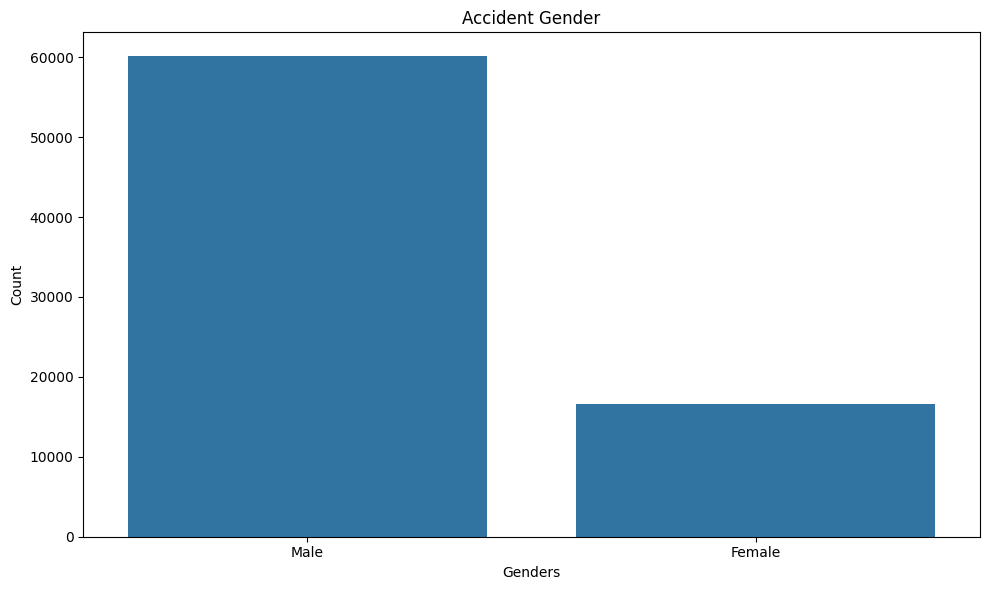

In [ ]:
#plot features of gender with countplot via seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=roadacci_cleaned)
plt.title('Accident Gender')
plt.xlabel('Genders')
plt.ylabel('Count')
plt.show()

จากกราฟจะเห็นได้ว่า จำนวนอุบัติเหตุเกิดขึ้นบนถนน มีเพศชายมากกว่าเพศหญิง

&emsp; 1.2.2 หาอัตราส่วนระหส่างเพศชายและหญิง

&emsp;&emsp; 1.2.2.1 หาจำนวนผู้เกิดอุบัติเหตุแยกตามเพศ

In [ ]:
#show/find unique features sum
roadacci_cleaned.groupby('gender')['gender'].count()

,gender
gender,
Female,16633
Male,60113


&emsp; จากข้อมูลจะเห็นได้ว่า ในชุดข้อมูลนี้ ผู้ชายจำนวน 60113 คน และผู้หญิง 16633 คน เกิดอุบัติเหตุบนถนนในประเทศไทย

&emsp;&emsp; 1.2.2.2 หาอัตราส่วนระหว่างเพศชายและหญิง

In [ ]:
#find ratio of each feature values
roadacci_cleaned.groupby('gender')['gender'].count() / roadacci_cleaned.shape[0] * 100

,gender
gender,
Female,21.672791
Male,78.327209


&emsp; จากข้อมูลจะเห็นได้ว่า อัตราส่วนที่เพศชายต่อผู้หญิงที่เกิดอุบัติเหตุ **เป็นอัตราส่วน 78.33 ต่อ 21.67**

&emsp; หรือสรุปได้ว่า **ผู้ชายเกิดอุบัติเหตุ 78.33% ซึ่งมากกว่าเพศหญิง 21.67 %**

1.3 จำนวนผู้ประสบอุบัติเหตุเทียบกับช่วงอายุ

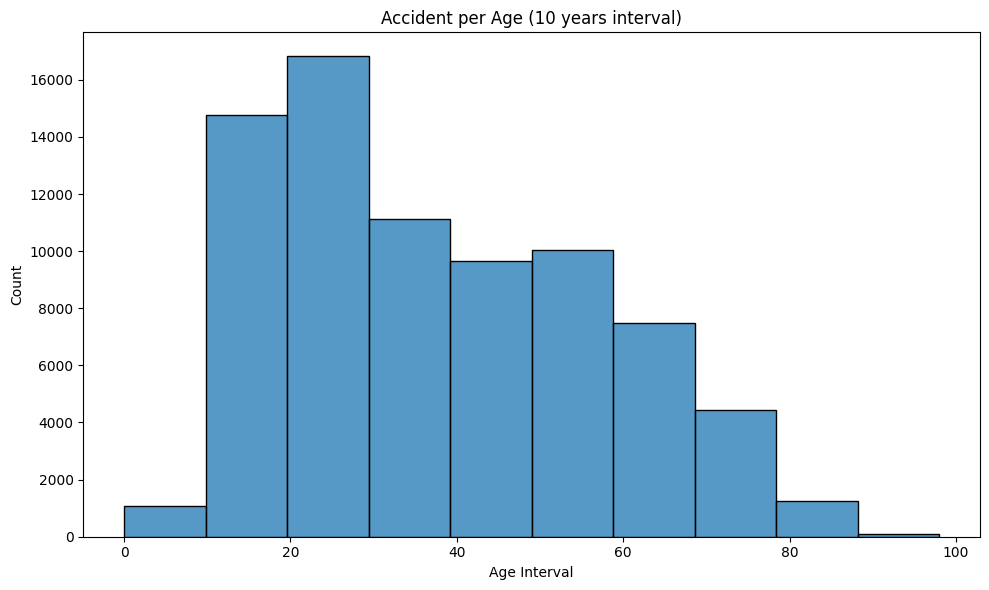

In [ ]:
#plot age interval (10 years binwidth)
plt.figure(figsize=(10, 6))
sns.histplot(data=roadacci_cleaned, x="age", binwidth=10)
plt.title('Accident per Age (10 years interval)')
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.show()

คุณจะเห็นได้ว่า
* ในช่วงอายุ 20 - 30 ปี มีผู้ประสบอุบัติเหตุมากที่สุด รองลงมาคือช่างอายุ 10 - 20 ปี
* ส่วนช่วงอายุที่ผู้ประสบอุบัติเหตุน้อยที่สุด คือ ช่วงมากกว่า 90 เป็นต้นไป

### 2. วิเคราะห์ชนิดของอุบัติเหตุบนถนนประเทศไทย

2.1 แสดงชนิดอุบัติเหตุที่เกิดขึ้นบนท้องถนนมากที่สุดในประเทศไทย 10 อันดับแรก

&emsp; 2.1.1 Plot graph เพื่อหาความถี่ของอุบัติเหตุที่เกิดบ่อยที่สุด

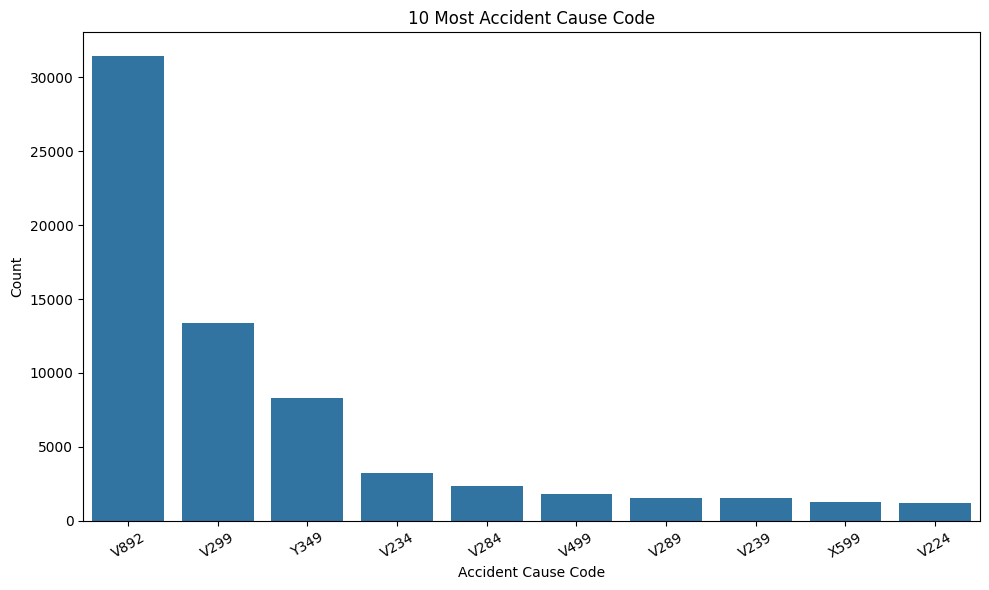

In [ ]:
#plot unique sum of accident_cause_code
plt.figure(figsize=(10, 6))
plt.xticks(rotation=30)
#using seaborn countplot with first most 10 values
sns.countplot(x='accident_cause_code', data=roadacci_cleaned,order=roadacci_cleaned.accident_cause_code.value_counts().iloc[:10].index)
plt.title('10 Most Accident Cause Code')
plt.xlabel('Accident Cause Code')
plt.ylabel('Count')
plt.show()

&emsp; จากข้อมูลจะเห็นได้ว่า อุบัติเหตุบนท้องถนนที่เกิดมากที่สุดคือ **รหัส V892 รองลงมาเป็นรหัส V299**

&emsp; 2.1.2 แปลงจากโค้ดรหัสอุบัติเหตุเป็นข้อมูลอุบัติเหตุจาก dataset acc_df

In [ ]:
#show accident_cause in conjunction with accident_cause_code
roadacci_cleaned.groupby('accident_cause_code')['accident_cause'].value_counts().sort_values(ascending=False).iloc[:10]

,,accident_cause
accident_cause_code,accident_cause,
V892,"Person injured in unspecified motor-vehicle accident, traffic",31483
V299,Motorcycle rider [any] injured in unspecified traffic accident,13400
Y349,"Unspecified event, undetermined intent at unspecified place",8301
V234,"Motorcycle rider injured in collision with car, pick-up truck or van at driver injured in traffic accident",3236
V284,Motorcycle rider injured in noncollision transport accident at driver injured in traffic accident,2320
V499,Car occupant [any] injured in unspecified traffic accidents,1786
V289,Motorcycle rider injured in noncollision transport accident at unspecified motorcycle rider injured in traffic accident,1538
V239,"Motorcycle rider injured in collision with car, pick-up truck or van at unspecified motorcycle rider injured in traffic accident",1510
X599,Exposure to unspecified factor at unspecified place,1266


&emsp; จากข้อมูล จะเห็นได้ว่า

* โค้ด V892 คือ Person injured in unspecified motor-vehicle accident, traffic หรือแปลได้ว่า อุบัติเหตุส่วนมากเกิดจากผู้ขับขี่ยานพาหนะบนท้องถนน (เช่น รถ และจักรยานยนต์ โดยภาพรวม)

* โค้ด V299 คือ Motorcycle rider [any] injured in unspecified traffic accident หรือแปลได้ว่า อุบัติเหตุรองลงมาเกิดจากผู้ขับขี่จักรยานยนต์ได้รับบาดเจ็บในเหตุการบนท้องถนน

### 3. วิเคราะห์จังหวัดที่เกิดอุบัติเหตุ

3.1 Plot Graph แสดงจังหวัดที่เกิดอุบัติเหตุมากที่สุด 10 อันดับแรก

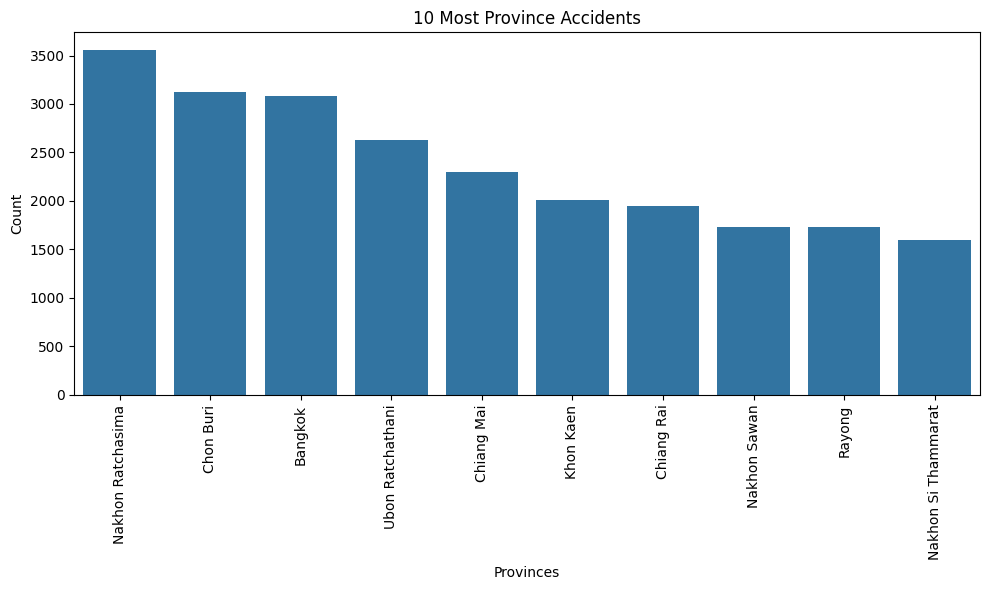

In [ ]:
#plot most province accident occurance
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
#suing seaborn countplot with first most 10 values
sns.countplot(x='province_en', data=roadacci_cleaned.sort_values(by='province_en'),order=roadacci_cleaned.province_en.value_counts().iloc[:10].index)
plt.title('10 Most Province Accidents')
plt.xlabel('Provinces')
plt.ylabel('Count')
plt.show()

&emsp; จากกราฟ จะเห็นได้ว่าจังหวัดที่เกิดอุบัติเหตุบนรถยนต์มากที่สุด คือ**จังหวัดนครราชสีมา รองลงมากคือ ชลบุรี และกรุงเทพตามลำดับ**

### 4. วิเคราะห์เชื้อชาติ

In [ ]:
#count unique feature in gender
roadacci_cleaned.nationality.value_counts()

,nationality
Thai,58888
Unknown,17858


&emsp; จากข้อมูลเห็นได้ว่า เชื้อชาติไทยเกิดอุบัติเหตุมากกว่าเชื้อชาติอื่น ๆ

### 5. ชนิดยานพาหนะ

5.1 แสดงผลยานพาหนะที่เกิดอุบัติเหตุมากที่สุด 10 อันดับแรก

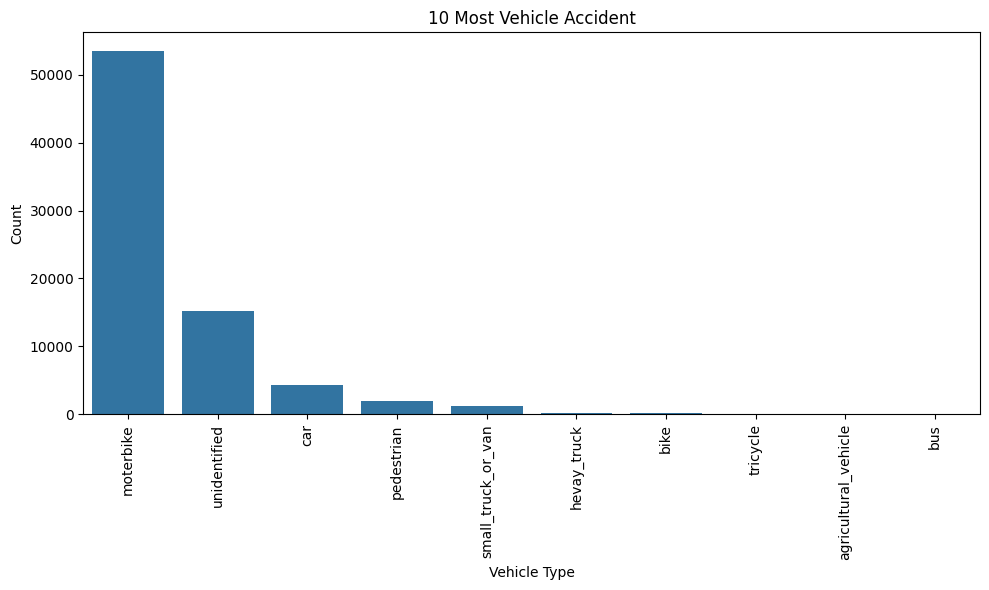

In [ ]:
#show type of vehicle that in accident
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
#using seaborn countplot with first most 10 values
sns.countplot(x='vehicle_type', data=roadacci_cleaned, order=roadacci_cleaned.vehicle_type.value_counts().iloc[:10].index)
plt.title('10 Most Vehicle Accident')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

&emsp; จากการฟเห็นได้ว่า ยานพาหนะที่เกิดอุบัติเหตุมากที่สุดคือ **moterbike (รถจักรยานยนต์)**

### 6. วิเคราะห์ร่วมทุกฟีเจอร์

6.1 ชนิดยานพาหะนะที่เกิดอุบัติเหตุมากที่สุด 10 อันดับแรก เทียบกับเพศต่าง ๆ

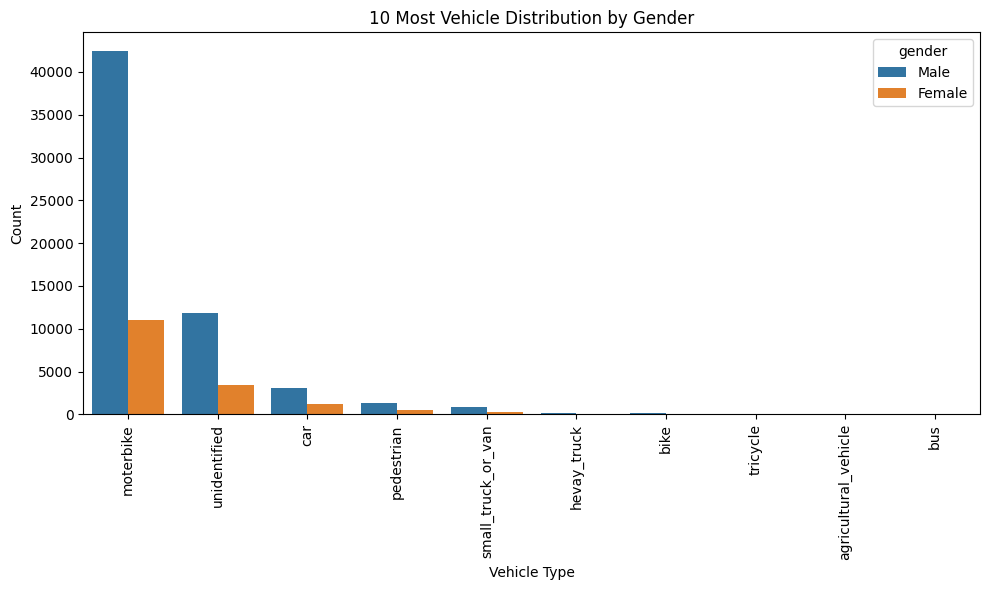

In [ ]:
#plot accident gender with vehicle
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
#using seaborn countplot with first most 10 values
#add hue gender for distingue between 2 values
sns.countplot(x='vehicle_type', hue='gender', data=roadacci_cleaned,order=roadacci_cleaned.vehicle_type.value_counts().iloc[:10].index)
plt.title('10 Most Vehicle Distribution by Gender')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

&emsp; จากกราฟสามารถวิเคราะห์ได้ว่า โดยรวมแล้ว**เพศที่ขับขี่ยานพาหนะแล้วเกิดอุบัติเหตุเป็นเพศชายมากกว่าเพศหญิง**


6.2 ช่วงอายุผู้เกิดอุบัติเหตุเทียบกับเพศ

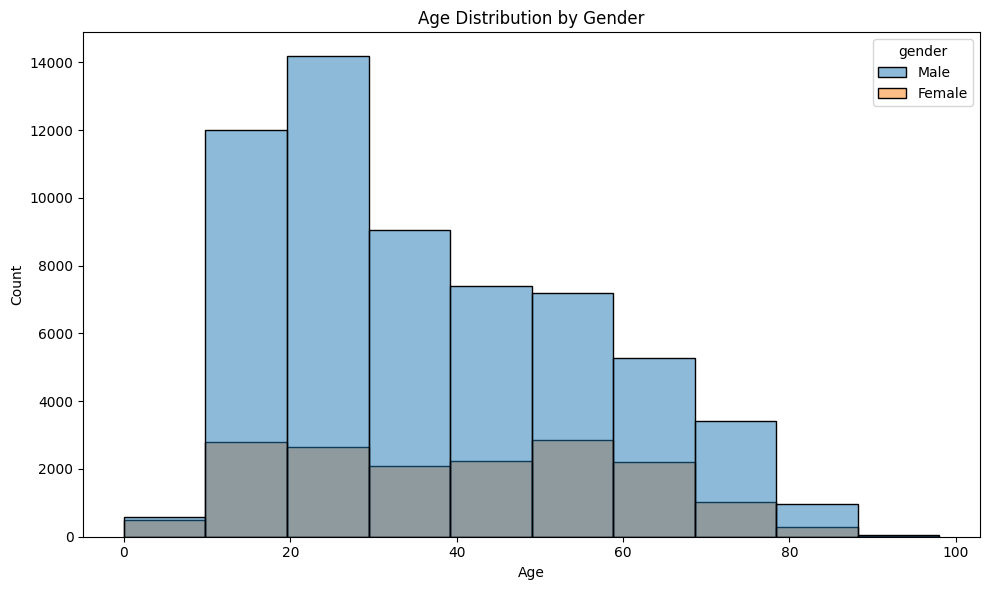

In [ ]:
#plot gender per age distribution (10 bin width)
plt.figure(figsize=(10, 6))
#using seaborn histplot to plot interval value with 2 values
sns.histplot(data=roadacci_cleaned, x='age', hue='gender', binwidth=10)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

&emsp; จากกราฟจะเห็นได้ว่าในทุกช่วงอายุ **มีผู้ชายที่ประสบอุบัติเหตุมากกว่าผู้หญิง**

6.3 อายุผู้ประสบอุบัติเหตุกับจังหวัดที่เกิดเหตุ

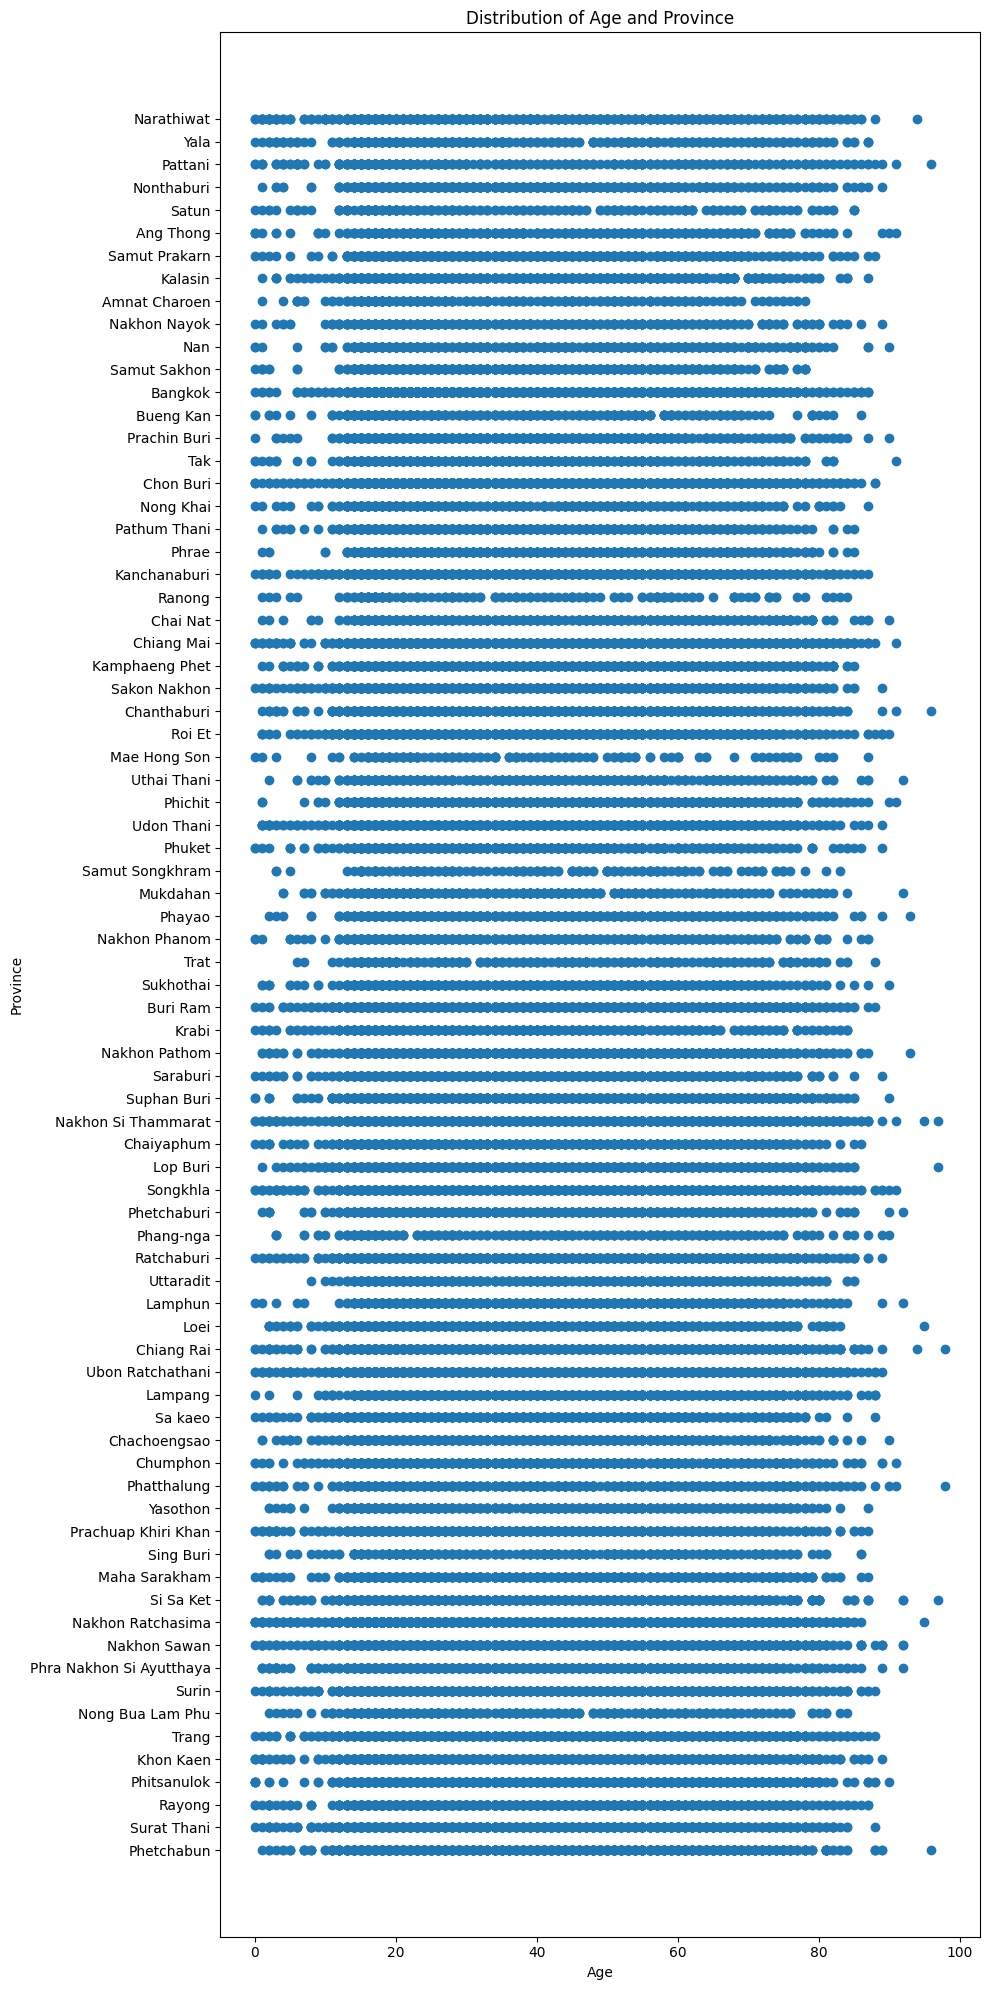

In [ ]:
#plot distribution between age and province
plt.figure(figsize=(10, 20))
#using seaborn scatter plot to plot age range in each province
plt.scatter(roadacci_cleaned['age'], roadacci_cleaned['province_en'])
plt.xlabel('Age')
plt.ylabel('Province')
plt.title('Distribution of Age and Province')
plt.show()

&emsp; จากกราฟจะเห็นได้ว่า อายุผู้ประสบอุบัติเหตุมีการกระจายในทุกจังหวัด

6.4 สัญชาติกับจังหวัดที่เกิดอุบัติเหตุมากที่สุด

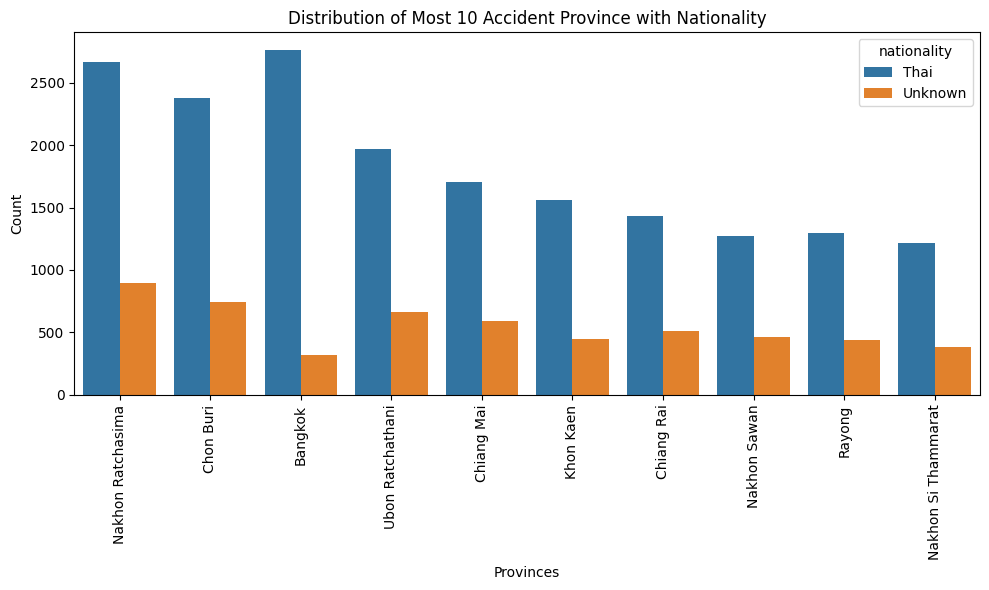

In [ ]:
#find relation of nationality and first 10 provinces
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
#using seaborn countplot to plot nationalty features
sns.countplot(x='province_en', hue='nationality', data=roadacci_cleaned,order=roadacci_cleaned.province_en.value_counts().iloc[:10].index)
plt.title('Distribution of Most 10 Accident Province with Nationality')
plt.xlabel('Provinces')
plt.ylabel('Count')
plt.show()

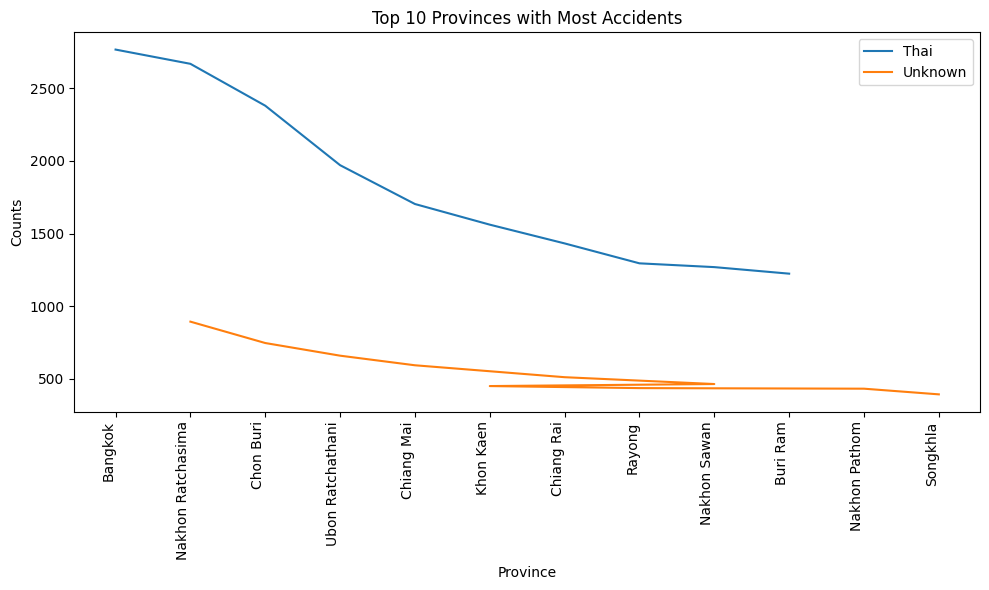

In [ ]:
#plot via pyplot

#create variable to store first 10 most for each nationality
plt_nation_Un = roadacci_cleaned[roadacci_cleaned['nationality'] == 'Unknown']['province_en'].value_counts().head(10).sort_values(ascending=False)
plt_nation_Thai = roadacci_cleaned[roadacci_cleaned['nationality'] == 'Thai']['province_en'].value_counts().head(10).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
#plot linegraph between 2 features
plt.plot(plt_nation_Thai.index, plt_nation_Thai.values, label="Thai")
plt.plot(plt_nation_Un.index, plt_nation_Un.values, label="Unknown")
plt.title('Top 10 Provinces with Most Accidents')
plt.xlabel('Province')
plt.ylabel('Counts')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

(matplotlib bug)

&emsp; จากกราฟจะเห็นได้**จำนวนคนสัญชาติมีจำนวนมากกว่าสัญชาติอื่น ๆ โดยมีอัตราส่วนใกล้เคียงกัน**

&emsp; ยกเว้น**กรุงเทพมหานครที่จะมีคนไทยมากกว่าที่เกิดอุบัติเหตุ**

6.5 หาความสัมพันธ์ของ accident_cause_code กับ ชนิดยานพาหนะที่เกิดอุบัติเหตุ

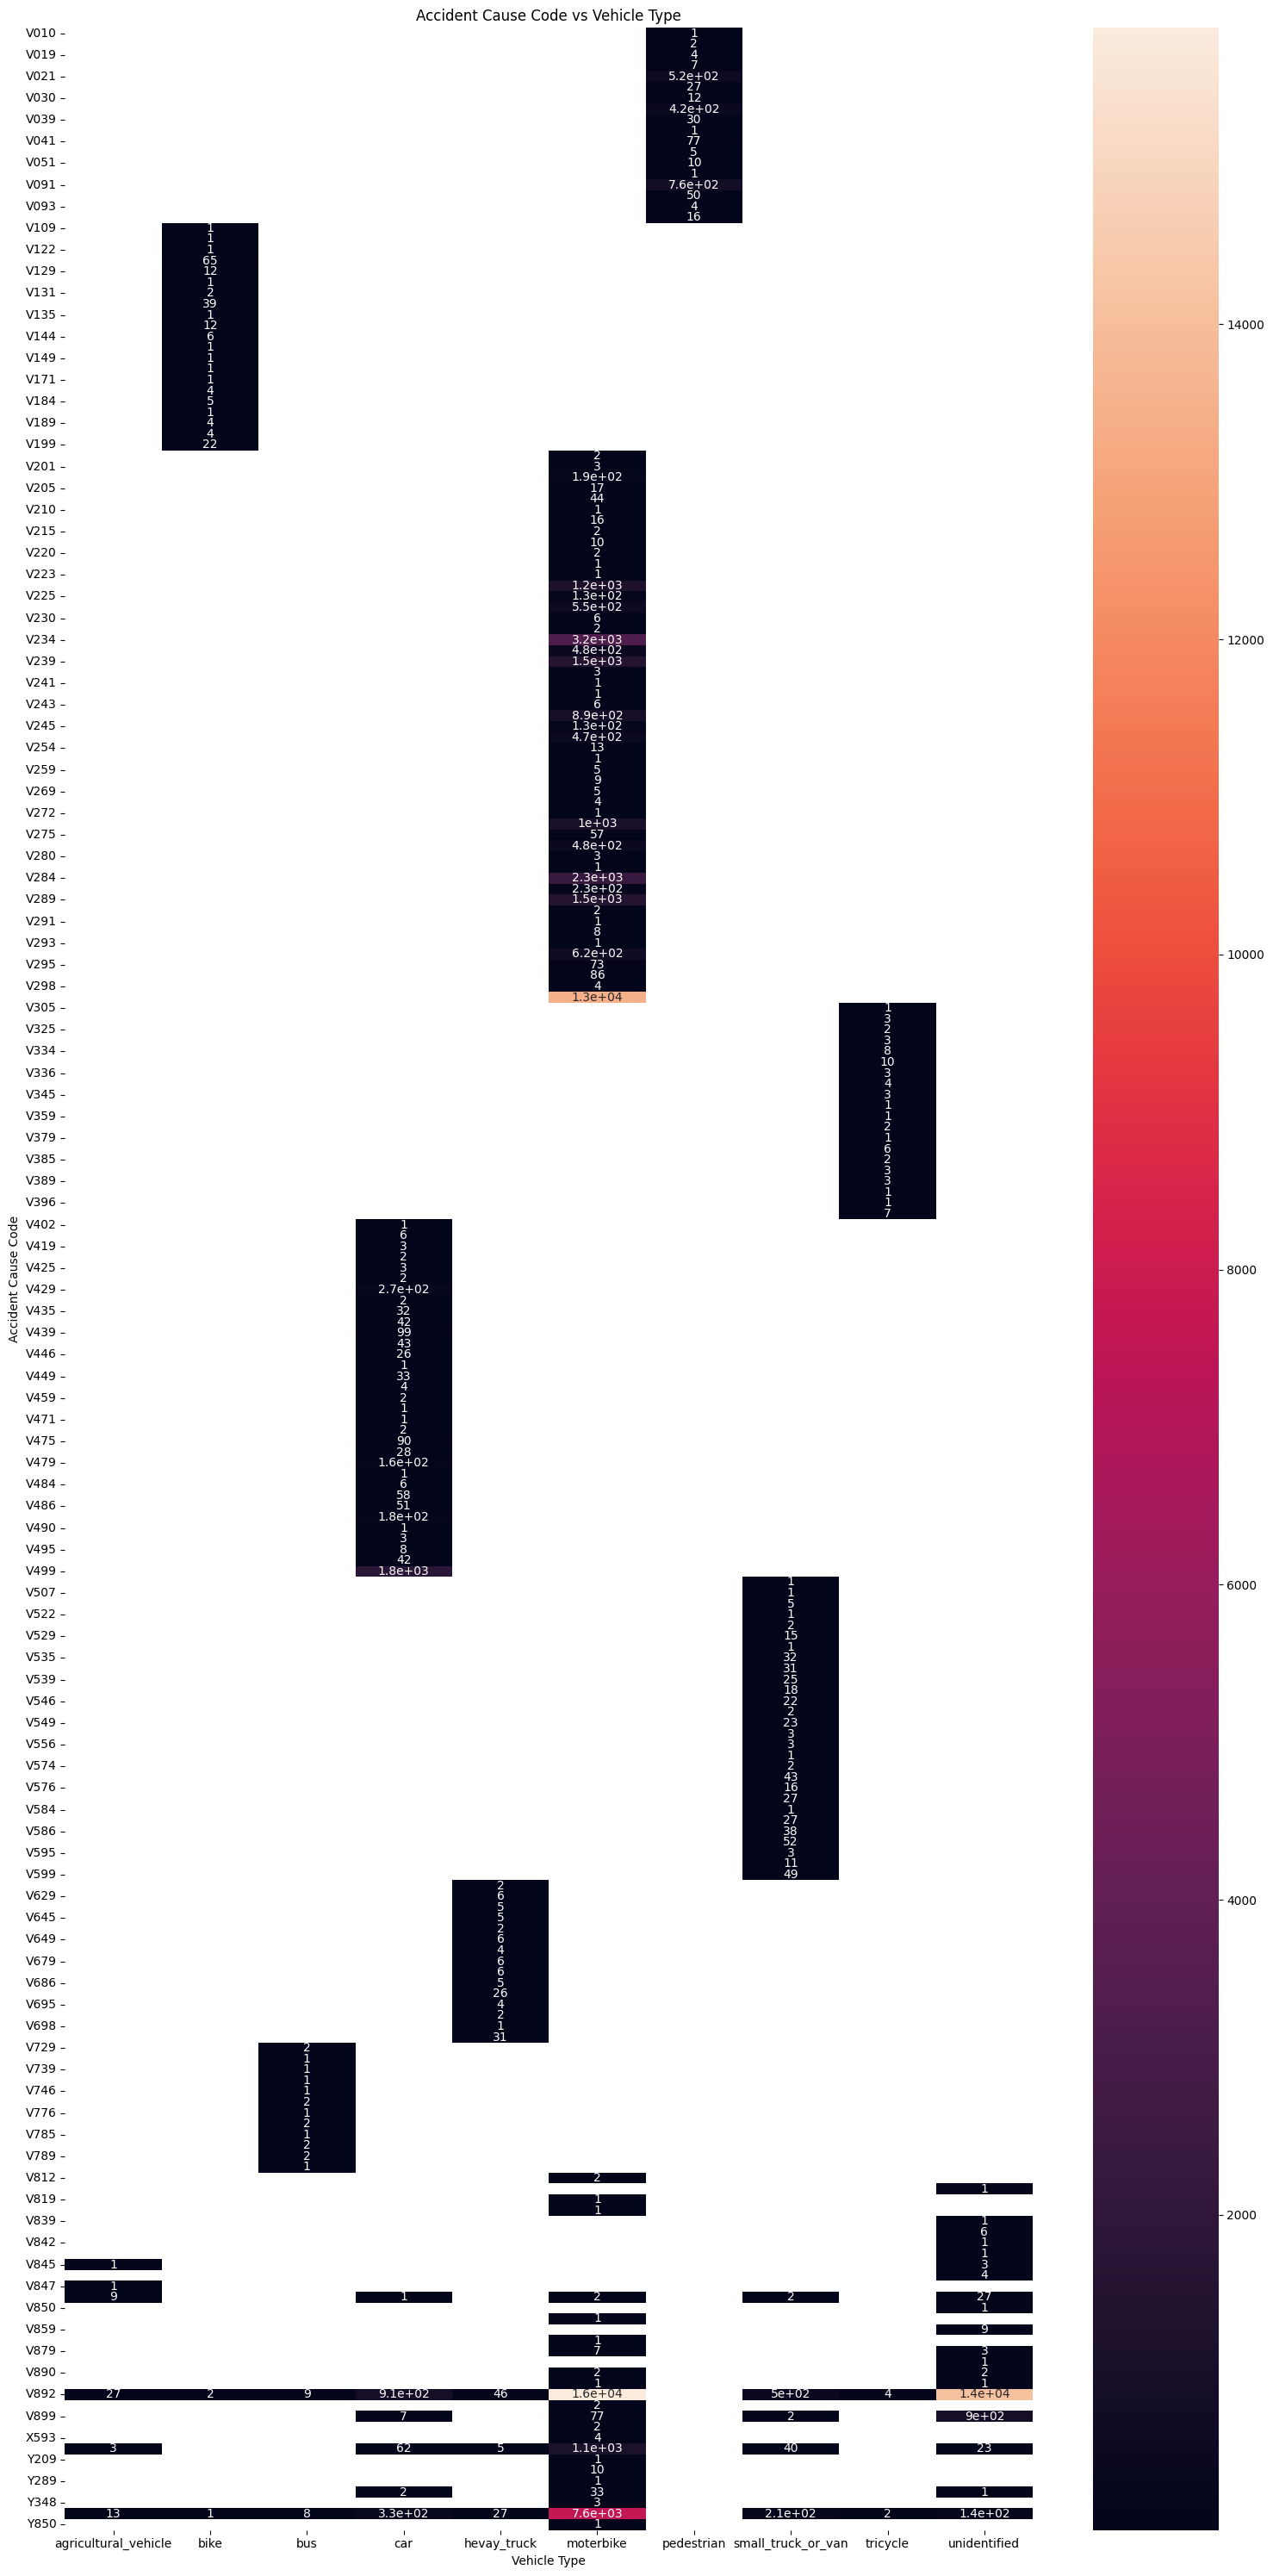

In [ ]:
#find relation between accident_cause_code and vehicle_type

#group each uniqure feature values
relationaccidata = roadacci_cleaned.groupby(['accident_cause_code', 'vehicle_type'])['accident_cause_code'].count().unstack()

plt.figure(figsize=(15, 30))
#using seaborn heatmap to plot how much value that is related to accident_cause_code
sns.heatmap(relationaccidata, annot=True)
plt.title('Accident Cause Code vs Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Accident Cause Code')
plt.show()

In [ ]:
#show reference dataset of accident_cause_code to accident_cause
roadacci_cleaned.groupby('accident_cause_code')['accident_cause'].value_counts().sort_values(ascending=False).iloc[:]

,,accident_cause
accident_cause_code,accident_cause,
V892,"Person injured in unspecified motor-vehicle accident, traffic",31483
V299,Motorcycle rider [any] injured in unspecified traffic accident,13400
Y349,"Unspecified event, undetermined intent at unspecified place",8301
V234,"Motorcycle rider injured in collision with car, pick-up truck or van at driver injured in traffic accident",3236
V284,Motorcycle rider injured in noncollision transport accident at driver injured in traffic accident,2320
...,...,...
V379,Occupant of three-wheeled motor vehicle injured in collision with fixed stationary object at unspecified occupant of three -wheeled motor vehicle injured in traffic accident,1
V359,Occupant of three-wheeled motor vehicle injured in collision with railway train or railway vehicle at unspecified occupant of three- wheeled motor vehicle injured in traffic accident,1
V349,Occupant of three-wheeled motor vehicle injured in collision with heavy transport vehicle or bus at unspecified occupant of three wheeled motor vihicle injured in traffice accident,1


&emsp; จากกราฟ Heatmap ด้านบน

* จะเห็นว่าชนิดของยานพาหนะที่เกิดอุบัติเหตุมีความสัมพันธ์ตามโค้ดที่ให้มา (Lookup Code ที่ Dataframe acc_df)

* สีเข้มของ heatmap บ่งบอกถึงความถี่ของข้อมูลที่ feature 2 อย่างตรงกัน

6.6 แผนที่การกระจายตัวของอุบัติเหตุในประเทศไทย

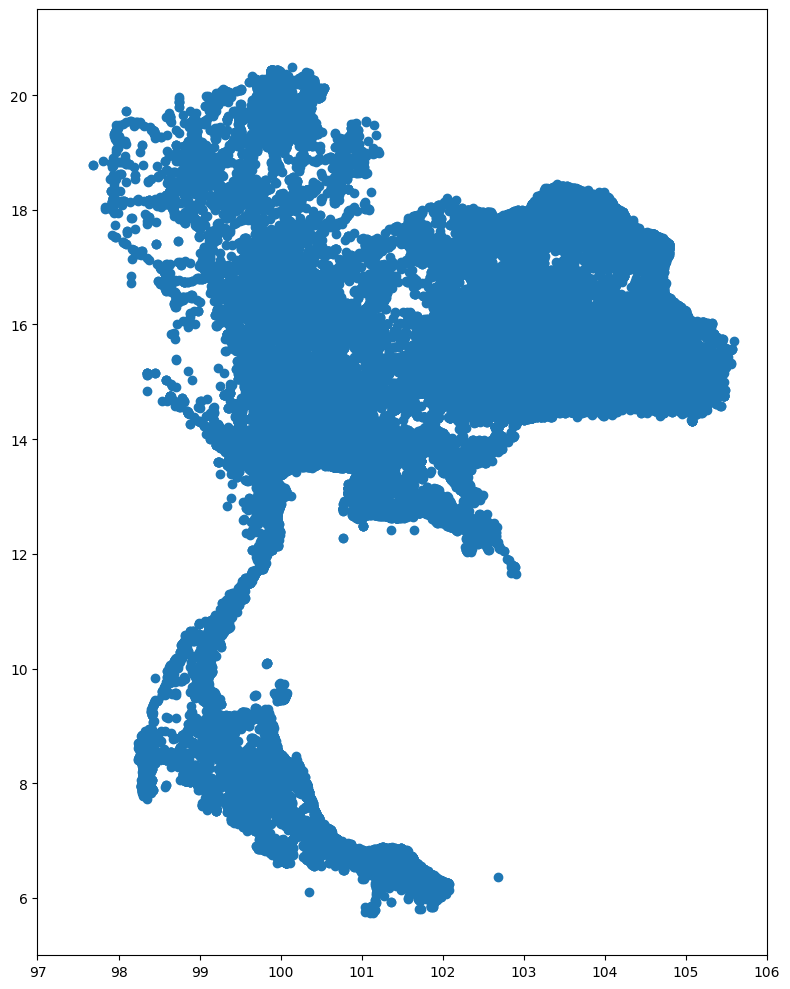

In [ ]:
#plot using pyplot scatter plot
plt.figure(figsize=(8, 10))
plt.scatter(x=roadacci_cleaned['longitude'], y=roadacci_cleaned['latitude'])
#limit to only certain interval to show more correctly
plt.xlim(97, 106)
plt.ylim(5, 21.5)
plt.show()

&emsp; จะเห็นว่า**ตำแหน่งที่เกิดอุบัติเหตุมีการกระจายตัวทั่วประเทศไทย**